In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [115]:
BIGdata = pd.read_csv(r'C:\Users\74857\데이콘야구\동국대\회원성적자료_복사본.txt',engine='python')

In [116]:
BIGdata.head()

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING,CHEONGSOL_YN
0,1,13907,2000,210,0,54.0,0.0,9,0
1,1,363741,1000,210,0,42.0,0.0,9,0
2,1,363741,2000,210,0,54.0,0.0,9,0
3,1,363741,3000,210,0,57.0,1.0,9,0
4,1,363741,4112,210,0,17.0,0.0,9,0


In [161]:
BIGdata['SCORE'].groupby([BIGdata['EXAMTYPE'],BIGdata['CHEONGSOL_YN']]).describe()

count       mean        std  min   25%   50%   75%  \
EXAMTYPE CHEONGSOL_YN                                                           
1        0             1635501.0  29.553236  31.515063  0.0   0.0  24.0  48.0   
2        0             2074565.0  49.350199  25.621772  0.0  28.0  46.0  72.0   
         1               28771.0  61.278579  22.551487  2.0  42.0  65.0  82.0   

                         max  
EXAMTYPE CHEONGSOL_YN         
1        0             100.0  
2        0             100.0  
         1             100.0

In [11]:
SUB_CD_LIST=list(BIGdata['SUB_CD'].unique())

In [117]:
BIGdata[:0]

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING,CHEONGSOL_YN


In [2]:
SUB_EXAMNO_LIST=[212,213,216,217,220,221,222,223,228,229,232,233,236,237,238,239,3002,3004,3005,3008,3009,3011,3013,3014,3021,3022,3023,3024
,3025,3026,3027,3028]

212~239는 모의고사. EXAMTYPE==1

In [19]:
## 데이터 과목별로 저장하는 방법
#for i in SUB_CD_LIST:
#    Alist= BIGdata[BIGdata['SUB_CD']==i]
#    Alist.to_csv(r'C:\Users\74857\데이콘야구\동국대\DATA_'+str(i)+'.csv',header=True,index=False)

In [119]:
#고 3데이터의 집합
#BIG3data=BIGdata[:0]
#for i in SUB_EXAMNO_LIST:
#    BIG3data= pd.concat([BIG3data,BIGdata[BIGdata['EXAMNO']==i]])
BIG3data.head()

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING,CHEONGSOL_YN
29792,1,14402,1000,212,47,90.0,31.0,6,0
29793,1,14402,2100,212,30,87.0,32.0,6,0
29794,1,14402,3000,212,50,94.0,38.0,5,0
29795,1,14402,4207,212,21,47.0,44.0,5,0
29796,1,14402,4213,212,15,47.0,44.0,5,0


In [128]:
len(BIG3data) 

2979319

# 고3 데이터 = 312만개의 데이터

In [20]:
BIG3data.describe() #의미가 없음

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING
count,3.125213e+06,3.125213e+06,3.125213e+06,3.125213e+06,3.125213e+06,3.125213e+06,3.125213e+06,3.125213e+06
mean,1.546868e+00,9.628403e+11,3.324312e+03,1.751455e+03,4.218625e+01,7.403589e+01,4.887278e+01,5.046101e+00
std,4.977986e-01,8.939357e+11,1.715644e+03,1.388821e+03,3.039567e+01,3.403655e+01,3.518490e+01,2.677018e+00
min,1.000000e+00,1.095100e+04,1.000000e+03,2.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,5.197901e+06,2.100000e+03,2.280000e+02,1.600000e+01,4.800000e+01,1.200000e+01,3.000000e+00
50%,2.000000e+00,1.711821e+12,3.000000e+03,3.002000e+03,4.000000e+01,6.300000e+01,5.300000e+01,5.000000e+00
75%,2.000000e+00,1.811809e+12,4.207000e+03,3.021000e+03,7.000000e+01,1.090000e+02,8.100000e+01,7.000000e+00
max,2.000000e+00,1.886815e+12,7.000000e+03,3.028000e+03,1.000000e+02,1.560000e+02,1.000000e+02,9.000000e+00


## 결측치 전혀 없음

In [121]:
BIG3data.isnull().sum() 

EXAMTYPE        0
MEM_NO          0
SUB_CD          0
EXAMNO          0
SCORE           0
AC_STD          0
AC_PCT          0
RATING          0
CHEONGSOL_YN    0
dtype: int64

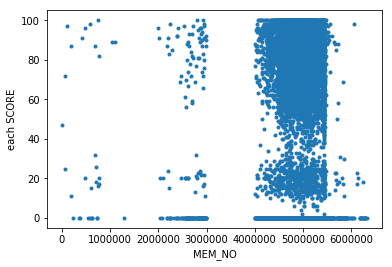

In [44]:
plt.plot(BIG3data[(BIG3data['SUB_CD']==1000) & (BIG3data['EXAMNO']==212)]['MEM_NO'],
         BIG3data[(BIG3data['SUB_CD']==1000) & (BIG3data['EXAMNO']==212)]['SCORE'],'.')
plt.xlabel('MEM_NO')
plt.ylabel('each SCORE')
plt.show()

## 모의고사의 경우 0점이 매우 많음

## 모의고사 별로, MEM_NO마다 sum(SCORE)==0인 사람들 수색해서 제거하기(이중 95%는 제거)

In [127]:
BIG3data = BIG3data.drop_duplicates()
len(BIG3data)

2097356

In [123]:
SC_33=BIG3data['SCORE'].groupby([BIG3data['EXAMNO'],BIG3data['MEM_NO']]).sum()

In [124]:
SC_33=SC_33.add_suffix('').reset_index()
SC_33.head()

,EXAMNO,MEM_NO,SCORE
0,212,14402,189
1,212,69420,169
2,212,77385,274
3,212,83920,100
4,212,101936,404


In [125]:
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe/32307259
elimitlist = SC_33[SC_33['SCORE']==0][['EXAMNO','MEM_NO']]
elimitlist.head()

,EXAMNO,MEM_NO
7,212,237672
8,212,321512
9,212,353627
10,212,370644
11,212,388415


## elimitlist에 있는 모든 학생은 제거를 추천(모든 입력 점수가 0인 학생들.)

In [130]:
BIG3data[~(BIG3data['EXAMNO'].isin(elimitlist['EXAMNO'])) | ~(BIG3data['MEM_NO'].isin(elimitlist['MEM_NO'])) ].head()

2112524

In [134]:
BIG3_elidata = BIG3data[~(BIG3data['EXAMNO'].isin(elimitlist['EXAMNO'])) | ~(BIG3data['MEM_NO'].isin(elimitlist['MEM_NO']))]

In [136]:
BIG3_elidata[BIG3_elidata['MEM_NO']==237672] #없어진 것을 확인.

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING,CHEONGSOL_YN


In [137]:
#BIG3_elidata=BIG3_elidata[BIG3_elidata['MEM_NO']!=5483777]

In [138]:
len(BIG3_elidata)

2112494

## 만든 데이터를 불러오는 곳

In [3]:
#BIG3_elidata.to_csv(r'C:\Users\74857\데이콘야구\동국대\DATA_eli.txt',header=False,index=False,sep=',')
#BIG3_elidata = pd.read_csv(r'C:\Users\74857\데이콘야구\동국대\DATA(revised).txt',engine='python')
#BIG3_elidata = pd.read_csv(r'C:\Users\74857\데이콘야구\동국대\DATA_eli.txt',engine='python')

## 위에서 #을 빼고 데이터를 불러오면 된다

C:\Users\74857\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\74857\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


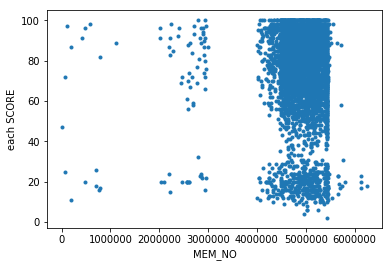

In [134]:
plt.plot(BIG3_elidata[(BIG3data['SUB_CD']==1000) & (BIG3_elidata['EXAMNO']==212)]['MEM_NO'],
         BIG3_elidata[(BIG3data['SUB_CD']==1000) & (BIG3_elidata['EXAMNO']==212)]['SCORE'],'.')
plt.xlabel('MEM_NO')
plt.ylabel('each SCORE')
plt.show()

## 원점수만 따진 표

In [140]:
BIG3_elidata['SCORE'].groupby([BIG3_elidata['EXAMTYPE'],BIG3_elidata['EXAMNO']]).describe()

count       mean        std  min   25%   50%   75%    max
EXAMTYPE EXAMNO                                                              
1        212      24266.0  50.475439  27.397855  0.0  28.0  45.0  76.0  100.0
         213      15081.0  53.171474  27.456796  0.0  31.0  47.0  80.0  100.0
         216      44606.0  50.689414  25.159465  0.0  32.0  45.0  74.0  100.0
         217      12310.0  54.088221  28.653354  0.0  31.0  47.0  83.0  100.0
         220      47981.0  52.333507  24.376802  0.0  35.0  47.0  75.0  100.0
         221       9717.0  49.532057  25.387587  0.0  30.0  45.0  72.0  100.0
         222      44878.0  54.082624  26.011960  0.0  34.0  47.0  80.0  100.0
         223      33028.0  57.019741  25.558989  0.0  37.0  57.0  80.0  100.0
         228      18390.0  46.400653  26.472747  0.0  24.0  42.0  70.0  100.0
         229      13628.0  47.725492  26.330667  0.0  26.0  44.0  72.0  100.0
         232      37231.0  49.789423  24.479643  0.0  30.0  45.0  72.0  100.0
         233       7708.0  52.206798  26.493932  0.0  31.0  47.0  77.0  100.0
         236      31433.0  53.644959  26.307700  0.0  33.0  47.0  80.0  100.0
         237       9852.0  47.640276  25.943332  0.0  26.0  44.0  72.0  100.0
         238      30496.0  51.335946  22.744739  0.0  36.0  48.0  71.0  100.0
         239      25449.0  50.237888  22.310761  0.0  35.0  47.0  69.0  100.0
2        3002    187960.0  45.892940  26.948897  0.0  22.0  41.0  70.0  100.0
         3004     62558.0  56.580933  25.483742  0.0  34.0  58.0  80.0  100.0
         3005    182951.0  49.497439  27.369420  0.0  25.0  45.0  75.0  100.0
         3008     73456.0  57.886490  23.611976  0.0  38.0  59.0  80.0  100.0
         3009    131819.0  55.675229  26.264119  0.0  35.0  51.0  80.0  100.0
         3011    116142.0  56.000344  25.879692  0.0  35.0  50.0  81.0  100.0
         3013     83786.0  57.511744  23.790863  0.0  40.0  55.0  79.0  100.0
         3021    195156.0  45.754878  25.475725  0.0  23.0  42.0  69.0  100.0
         3022     68248.0  50.254410  23.378223  0.0  31.0  50.0  71.0  100.0
         3023    119802.0  49.925026  25.311615  0.0  28.0  48.0  73.0  100.0
         3024     92495.0  54.261690  22.963293  0.0  36.0  53.0  74.0  100.0
         3025     68870.0  54.817729  23.739264  0.0  34.0  55.0  76.0  100.0
         3026    121377.0  50.723514  25.572832  0.0  29.0  48.0  74.0  100.0
         3027    132066.0  53.114185  23.078526  0.0  36.0  51.0  73.0  100.0
         3028     69754.0  56.610259  24.274924  0.0  38.0  57.0  79.0  100.0

In [141]:
BIG3_elidata['SCORE'].groupby([BIG3_elidata['EXAMTYPE'],BIG3_elidata['EXAMNO'],BIG3_elidata['SUB_CD']]).describe()

count       mean        std  min    25%   50%  \
EXAMTYPE EXAMNO SUB_CD                                                    
1        212    1000     4545.0  73.053465  22.728399  2.0  64.00  79.0   
                2100     2404.0  61.522463  24.858616  0.0  48.00  68.0   
                2200     1773.0  58.402143  26.687138  0.0  39.00  61.0   
                3000     4113.0  70.969122  23.695699  0.0  60.00  78.0   
                4102      462.0  30.753247  12.525191  0.0  22.00  32.0   
                4103      272.0  36.121324  12.686832  0.0  28.00  40.0   
                4107       91.0  34.351648  13.950208  6.0  22.00  38.0   
                4110       56.0  32.053571  14.632988  5.0  17.75  36.0   
                4111      881.0  36.323496  12.063601  0.0  30.00  39.0   
                4116      858.0  31.898601  11.757774  0.0  26.00  33.0   
                4117      159.0  30.867925  13.446148  0.0  20.00  33.0   
                4118      133.0  34.112782  13.027741  7.0  24.00  37.0   
                4119      240.0  34.016667  12.745322  3.0  27.00  37.0   
                4201      617.0  27.794165  13.500773  0.0  16.00  28.0   
                4203     1060.0  29.309434  12.890565  0.0  19.00  30.0   
                4207     1368.0  32.035088  13.046098  0.0  23.00  35.0   
                4213     1440.0  26.512500  12.899402  0.0  16.00  25.0   
                7000     3794.0  29.866632  11.615382  0.0  23.00  31.0   
         213    1000     2775.0  73.891892  21.113604  2.0  65.00  79.0   
                2100     1425.0  72.341053  23.409794  0.0  65.00  80.0   
                2200     1174.0  65.578365  26.160015  0.0  47.00  70.0   
                3000     2528.0  74.456883  21.187120  0.0  67.00  80.0   
                4102      302.0  37.649007  12.086179  0.0  32.25  41.5   
                4103      182.0  35.576923  13.086289  0.0  28.00  39.0   
                4107       59.0  35.864407  14.139036  4.0  24.00  41.0   
                4110       24.0  32.541667  12.258020  6.0  25.75  34.0   
                4111      555.0  35.129730  11.543096  0.0  29.00  37.0   
                4116      517.0  34.940039  12.233290  0.0  30.00  37.0   
                4117      125.0  34.536000  13.811837  2.0  24.00  40.0   
                4118       84.0  33.988095  14.514217  3.0  22.00  37.0   
...                         ...        ...        ...  ...    ...   ...   
2        3027   4119     1048.0  31.374046  12.635715  0.0  22.00  34.0   
                4201     3699.0  31.759394  12.012116  0.0  23.00  33.0   
                4202      157.0  19.751592  11.120353  0.0  10.00  18.0   
                4203     5008.0  35.471645  11.904218  0.0  29.00  39.0   
                4204      168.0  28.077381  12.161585  4.0  15.00  31.0   
                4207    11283.0  35.309315  11.036629  0.0  29.00  38.0   
                4208      658.0  30.142857  11.139804  0.0  23.00  33.0   
                4213     9431.0  28.288835  11.451855  0.0  19.00  29.0   
                4214      362.0  30.378453  12.449026  0.0  19.25  33.0   
         3028   1000    14267.0  77.106329  17.480440  2.0  71.00  82.0   
                2100     7337.0  65.629821  15.999338  0.0  59.00  68.0   
                2200     6425.0  55.900233  18.256479  0.0  45.00  59.0   
                3000    14020.0  75.835093  14.935453  2.0  70.00  79.0   
                4102     1422.0  35.829114  12.375530  2.0  29.00  40.0   
                4103     1235.0  28.500405   9.982917  0.0  22.50  30.0   
                4107      471.0  41.628450   9.991058  2.0  39.00  45.0   
                4110       81.0  24.790123  13.914665  2.0  10.00  26.0   
                4111     3164.0  34.924779  10.222935  0.0  30.00  37.0   
                4116     3328.0  39.514724  10.335044  2.0  37.00  43.0   
                4117      806.0  39.512407  11.238541  2.0  35.25  44.0   
                4118      542.0  40.252768  11.3143

## 이투스는 각 시험당 약 13000명을 가지고 있으며, 모의고사는 약 4000명에 불과함


# 고려할 것

>> 한 학생의 extype==1에 있는 대표등급 -> extype==2에 있는 대표등급의 관계
한 사람의 등급 뿐만 아니라 백분위점수를 활용하는 방법도 있다.
한 사람의 등급을 무엇으로 설정할 수 있는가? 그사람이 그 과목에서 본 등급의 1. 최빈값 2. 중앙값 3. 평균 4. 최대,최소
백분위 점수의 평균
>> 


## 가정
1.extype==1인 시험은 모두 난이도가 같고. extype==2 에 대해서도 마찬가지다.

2.그 사람의 등급은 대표값이 결정하고, 대표값과 다른 경우는 오류가 생긴 것이다.

3.최종 결과의 등급 예측은, 수능에서의 비율이 현재 가진 데이터의 비율(extype=1 와 
)과 같다.왜냐? 2type->1type에서의 변환식은 둘의 교집합에 의해서만 변하지만, 등급을 다시 매길때,얼마나 등급이 변경 될지의 비율이 달라지기 때문에, 수능에서도 동일하다고 가정해야한다. 단, 이때 오류가 식에 의한 오류인지, 정말 수능에서의 비율에서 나오는 오차인지 알 수 없다.

In [4]:
EX_1list=[212,213,216,217,220,221,228,229,232,233,236,237] #222,223, 238,239는 수능 데이터이다.
EX_2list=[3002,3004,3005,3008,3009,3011,3013,3014,3021,3022,3023,3024,3025,3026,3027,3028]

In [5]:
sampledata = BIG3_elidata.copy()
sampledata_ex1=sampledata[sampledata['EXAMTYPE']==1]
sampledata_ex2=sampledata[sampledata['EXAMTYPE']==2]

In [131]:
len(sampledata[(sampledata['MEM_NO'].isin(intersut)) & (sampledata["EXAMNO"].isin([212,213,216,217,220,221,3002,3004,3005,3008,3009,3011,3013])) & (sampledata["SUB_CD"]==1000)]['MEM_NO'].unique())

104

In [130]:
len(sampledata[(sampledata['MEM_NO'].isin(intersut)) & (sampledata["EXAMNO"].isin([228,229,232,233,236,237,3021,3022,3023,3024,3025,3026,3027,3028]))]['MEM_NO'].unique())

581

In [ ]:
len(sampledata[(sampledata['MEM_NO'].isin(intersut)) & (sampledata["EXAMNO"].isin([212,213,216,217,220,221]))])

In [120]:
sampledata.head()

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING,CHEONGSOL_YN
0,1,14402,1000,212,47,90.0,31.0,6,0
1,1,14402,2100,212,30,87.0,32.0,6,0
2,1,14402,3000,212,50,94.0,38.0,5,0
3,1,14402,4207,212,21,47.0,44.0,5,0
4,1,14402,4213,212,15,47.0,44.0,5,0


# 시험타입 1과 2의 각각의 멤버의 수

In [3]:
len((list(BIG3_elidata[BIG3_elidata['EXAMTYPE']==1]['MEM_NO'].unique())))

56369

In [4]:
len(list(BIG3_elidata[BIG3_elidata['EXAMTYPE']==2]['MEM_NO'].unique()))

165205

In [6]:
stulist = set(list(BIG3_elidata[BIG3_elidata['EXAMTYPE']==1]['MEM_NO'].unique())).intersection(set(list(BIG3_elidata[BIG3_elidata['EXAMTYPE']==2]['MEM_NO'].unique())))
intersut=list(stulist)

## 분석방향 : A시험을 본 사람의 대표적인 등급 -> B시험에서의 대표적인 등급은 어떻게 변화하는가.
>
해야할것 : 

등급과 백분위
#### 1. 등급은 반드시 정규분포를 따른다.
#### 2. 한 사람에 대해 대표 등급을 구한다. -> extype 1에서 하나, 2에서 하나.
-> 
#### 3. 이 대표값들의 extype==1과 2에서의 상관관계를 구한다.
#### 4. 상관관계가 없으면 폐기하고, 충분히 강하면, 관계식을 찾는다. 회귀, nn, 

#### 5. 2에서 1로서의 변환 관계식을 변환 후에, 수능을 본 사람들만을 뽑아 수능 대표값

In [94]:
Sumind = sampledata_ex1[sampledata_ex1['MEM_NO']==14402]['AC_STD'].groupby(sampledata_ex1['SUB_CD']).mean().add_suffix('').reset_index()
kk=Sumind[Sumind['SUB_CD']==str(1000)]['AC_STD'][0]

이 데이터들의 저장을 위해선 멤버 수만큼의 길이와 41개 과목코드의 컬럼이 필요. -> 대표값마다 다른 데이터가 만들어짐.

In [21]:
SUBLIST= BIG3_elidata['SUB_CD'].unique()
SUBLIST = np.sort(SUBLIST)

In [9]:
collist=['MEM_NO']
for i in np.sort(SUBLIST):
    collist.append(str(i))

In [10]:
#위 세가지 결과로 데이터프레임 틀을 만든다.

EX1_represent=pd.DataFrame(None,columns = collist)
EX1_represent['MEM_NO']= intersut
EX1_represent.head()



,MEM_NO,1000,2100,2200,3000,4102,4103,4107,4110,4111,...,5001,5002,5003,5004,5005,5006,5007,5008,5009,7000
0,4007938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5976067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4560904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4730898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5894170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#멤버 넘버가 같고
for mem_no in EX1_represent['MEM_NO']:
    Sumind = sampledata_ex1[sampledata_ex1['MEM_NO']==mem_no]['AC_PCT'].groupby(sampledata_ex1['SUB_CD']).mean().add_suffix('').reset_index()
    #한 멤버의 대표값을 만들어 임시 리스트에 저장한다
    for i in range(len(EX1_represent.columns)):
        
        #한 사람이 어떤 과목을 봤을지 모르므로 다 확인해 보는게 맞다
        if EX1_represent.columns[i] in list(Sumind['SUB_CD']):
                    EX1_represent.loc[EX1_represent['MEM_NO']==mem_no,EX1_represent.columns[i]] = Sumind[EX1_represent.columns[i]==Sumind['SUB_CD']]['AC_PCT'].iloc[0] #컬럼과 뽑아낸 과목코드가 같은 것의 값을

In [12]:
EX1_represent.head()

,MEM_NO,1000,2100,2200,3000,4102,4103,4107,4110,4111,...,5001,5002,5003,5004,5005,5006,5007,5008,5009,7000
0,4007938,17.3333,38,31.3333,52,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
1,5976067,62,NaN,47,49,NaN,NaN,NaN,NaN,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
2,4560904,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4730898,52,47,NaN,72,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
4,5894170,77.5,NaN,90,75.5,88.5,95,NaN,NaN,NaN,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.5


In [13]:
EX2_represent=pd.DataFrame(None,columns = collist)
EX2_represent['MEM_NO']= intersut


In [14]:
#멤버 넘버가 같고
for mem_no in EX2_represent['MEM_NO']:
    Sumind = sampledata_ex2[sampledata_ex2['MEM_NO']==mem_no]['AC_PCT'].groupby(sampledata_ex2['SUB_CD']).mean().add_suffix('').reset_index()
    #한 멤버의 대표값을 만들어 임시 리스트에 저장한다
    for i in range(len(EX2_represent.columns)):
        
        #한 사람이 어떤 과목을 봤을지 모르므로 다 확인해 보는게 맞다
        if EX2_represent.columns[i] in list(Sumind['SUB_CD']):
                    EX2_represent.loc[EX2_represent['MEM_NO']==mem_no,EX2_represent.columns[i]] = Sumind[EX2_represent.columns[i]==Sumind['SUB_CD']]['AC_PCT'].iloc[0] #컬럼과 뽑아낸 과목코드가 같은 것의 값을

In [15]:
EX2_represent.head()

,MEM_NO,1000,2100,2200,3000,4102,4103,4107,4110,4111,...,5001,5002,5003,5004,5005,5006,5007,5008,5009,7000
0,4007938,18,NaN,67,40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5976067,51,NaN,7,80,NaN,NaN,NaN,NaN,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4560904,67,58,NaN,60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4730898,50.8,27.8,NaN,92,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5894170,55.5,NaN,70.625,92.5,64.5,76.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 교집합에 대한 과목별 대표값을 모아놓은 곳

In [17]:
#EX1_represent.to_csv(r'C:\Users\74857\데이콘야구\동국대\EX1_inter.csv',header=True,index=False)
#EX2_represent.to_csv(r'C:\Users\74857\데이콘야구\동국대\EX2_inter.csv',header=True,index=False)
#EX1_represent = pd.read_csv(r'C:\Users\74857\데이콘야구\동국대\EX1_inter.csv',engine='python')
#EX2_represent = pd.read_csv(r'C:\Users\74857\데이콘야구\동국대\EX2_inter.csv',engine='python')

In [22]:
for j in SUBLIST:
    j = str(j)
    print("과목코드"+str(j)+"의 상관관계는 " 
          + str(np.round(EX1_represent[j].astype('float64').corr(EX2_represent[j].astype('float64')),3)))

과목코드1000의 상관관계는 0.59
과목코드2100의 상관관계는 0.587
과목코드2200의 상관관계는 0.542
과목코드3000의 상관관계는 0.508
과목코드4102의 상관관계는 0.565
과목코드4103의 상관관계는 0.481
과목코드4107의 상관관계는 0.743
과목코드4110의 상관관계는 0.937
과목코드4111의 상관관계는 0.518
과목코드4116의 상관관계는 0.302
과목코드4117의 상관관계는 0.555
과목코드4118의 상관관계는 0.745
과목코드4119의 상관관계는 0.409
과목코드4201의 상관관계는 0.486
과목코드4202의 상관관계는 0.257
과목코드4203의 상관관계는 0.408
과목코드4204의 상관관계는 0.232
과목코드4207의 상관관계는 0.526
과목코드4208의 상관관계는 0.683
과목코드4213의 상관관계는 0.449
과목코드4214의 상관관계는 0.216
과목코드5001의 상관관계는 nan
과목코드5002의 상관관계는 nan
과목코드5003의 상관관계는 nan
과목코드5004의 상관관계는 nan
과목코드5005의 상관관계는 nan
과목코드5006의 상관관계는 nan
과목코드5007의 상관관계는 nan
과목코드5008의 상관관계는 nan
과목코드5009의 상관관계는 nan
과목코드7000의 상관관계는 nan


In [23]:
from sklearn.ensemble import RandomForestRegressor


In [32]:
rd.seed(1234)
train_number = rd.sample(range(len(intersut)),round(len(intersut)*0.75))
test_number = []
for i in range(len(intersut)):
    if i not in train_number:
        test_number.append(i)

train_data_ex1, train_data_ex2 = EX1_represent.loc[train_number] , EX2_represent.loc[train_number]

test_data_ex1, train_test_ex2 = EX1_represent.loc[test_number] , EX2_represent.loc[test_number]

In [33]:
for j in SUBLIST:
    j = str(j)
    print("과목코드"+str(j)+"의 상관관계는 " 
          + str(np.round(train_data_ex1[j].astype('float64').corr(train_data_ex2[j].astype('float64')),3)))

과목코드1000의 상관관계는 0.608
과목코드2100의 상관관계는 0.571
과목코드2200의 상관관계는 0.661
과목코드3000의 상관관계는 0.512
과목코드4102의 상관관계는 0.525
과목코드4103의 상관관계는 0.474
과목코드4107의 상관관계는 0.73
과목코드4110의 상관관계는 0.938
과목코드4111의 상관관계는 0.566
과목코드4116의 상관관계는 0.34
과목코드4117의 상관관계는 0.558
과목코드4118의 상관관계는 0.745
과목코드4119의 상관관계는 0.584
과목코드4201의 상관관계는 0.493
과목코드4202의 상관관계는 0.264
과목코드4203의 상관관계는 0.375
과목코드4204의 상관관계는 0.476
과목코드4207의 상관관계는 0.472
과목코드4208의 상관관계는 0.523
과목코드4213의 상관관계는 0.558
과목코드4214의 상관관계는 0.096
과목코드5001의 상관관계는 nan
과목코드5002의 상관관계는 nan
과목코드5003의 상관관계는 nan
과목코드5004의 상관관계는 nan
과목코드5005의 상관관계는 nan
과목코드5006의 상관관계는 nan
과목코드5007의 상관관계는 nan
과목코드5008의 상관관계는 nan
과목코드5009의 상관관계는 nan
과목코드7000의 상관관계는 nan


In [50]:
train_data_ex1.isnull().sum()

MEM_NO      0
1000       37
2100      200
2200      277
3000       49
4102      385
4103      403
4107      425
4110      432
4111      354
4116      362
4117      417
4118      422
4119      411
4201      365
4202      430
4203      350
4204      432
4207      257
4208      420
4213      282
4214      427
5001      370
5002      434
5003      435
5004      436
5005      435
5006      433
5007      436
5008      435
5009      433
7000       61
dtype: int64

In [47]:
train_data_ex2.isnull().sum()

MEM_NO      0
1000        0
2100      174
2200      263
3000        0
4102      384
4103      400
4107      423
4110      433
4111      351
4116      363
4117      416
4118      417
4119      408
4201      362
4202      430
4203      353
4204      432
4207      239
4208      418
4213      275
4214      427
5001      436
5002      436
5003      436
5004      436
5005      436
5006      436
5007      436
5008      436
5009      436
7000      436
dtype: int64

In [99]:
train_datalist = []
for i in SUBLIST:
    train_datalist.append(pd.merge(pd.DataFrame({'ex2_'+str(i) : train_data_ex2[str(i)]}),pd.DataFrame({'ex1_'+str(i): train_data_ex1[str(i)]}),left_index= True,right_index=True).dropna())
    

In [60]:
len(train_data_1000.dropna())

399

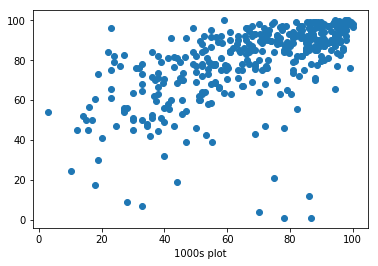

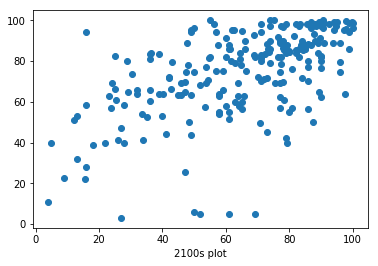

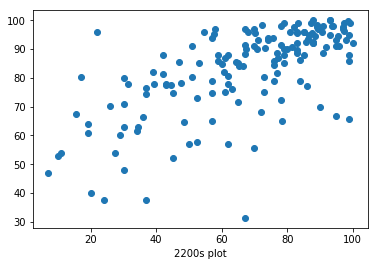

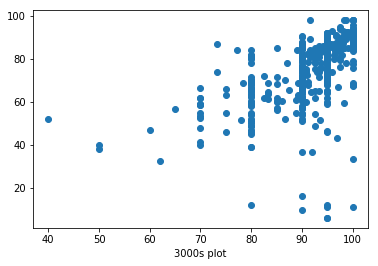

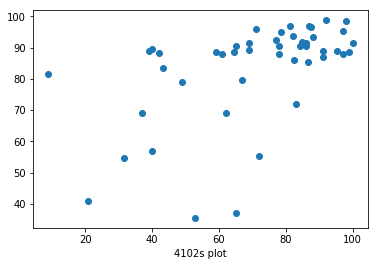

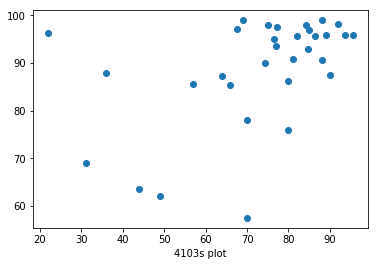

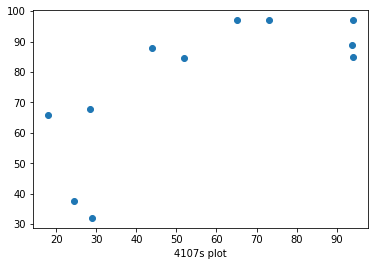

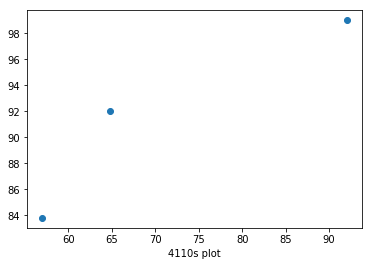

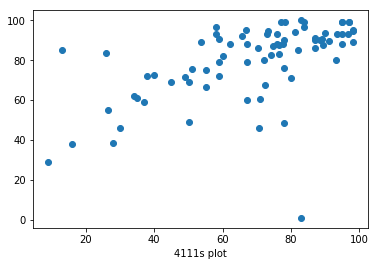

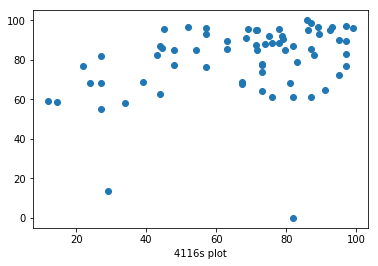

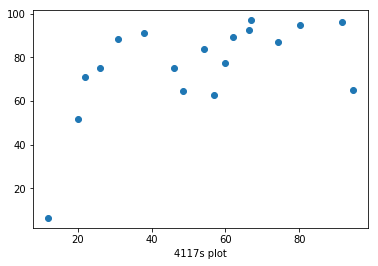

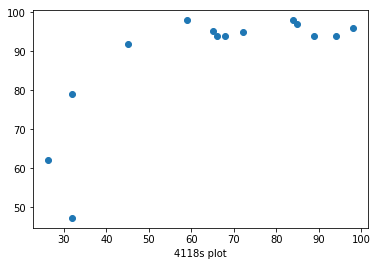

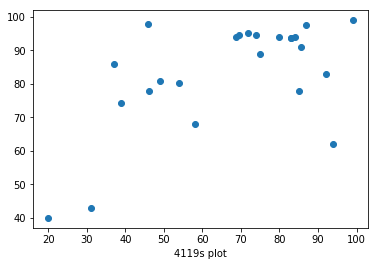

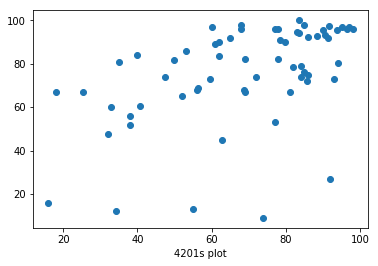

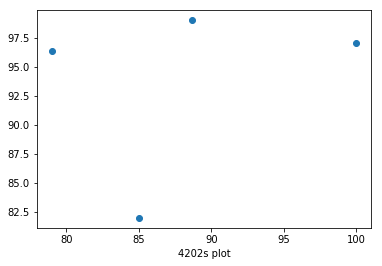

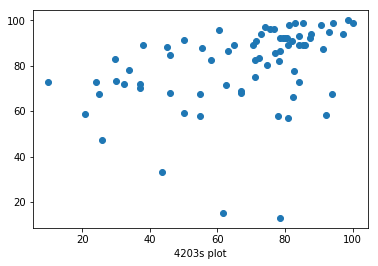

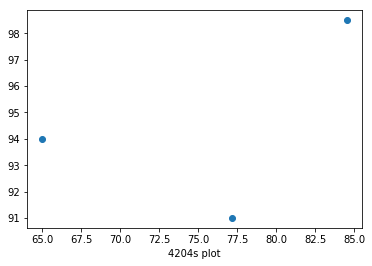

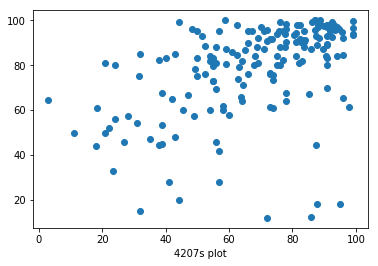

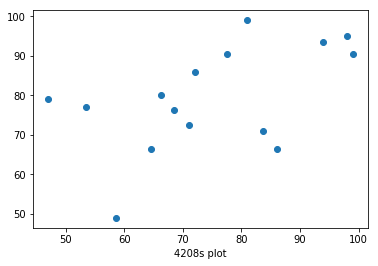

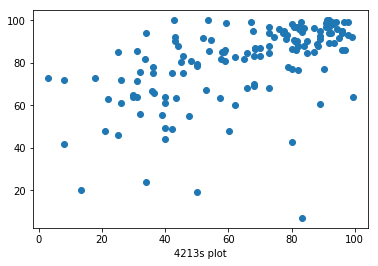

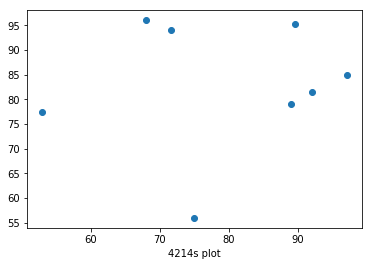

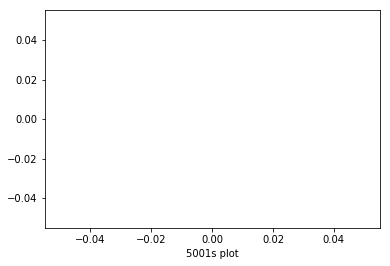

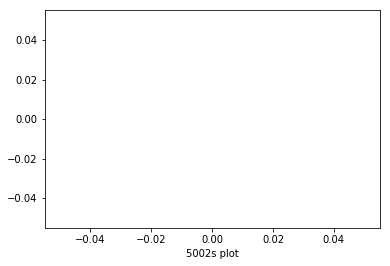

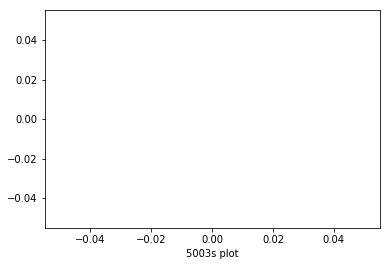

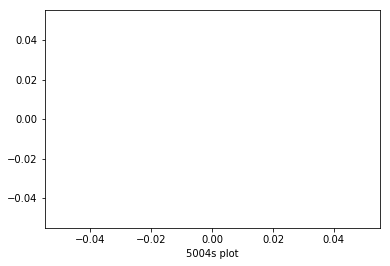

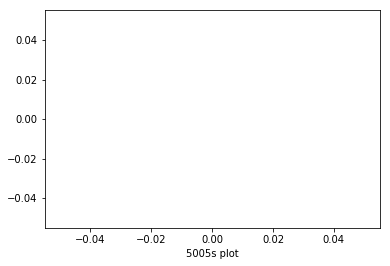

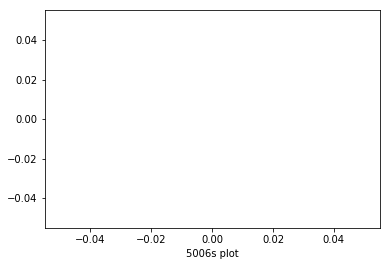

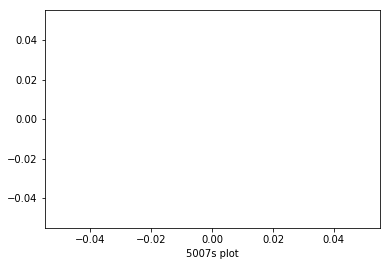

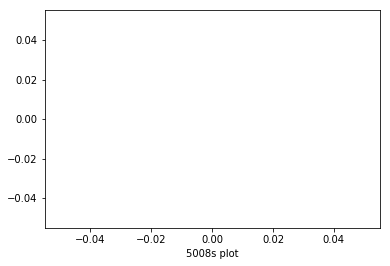

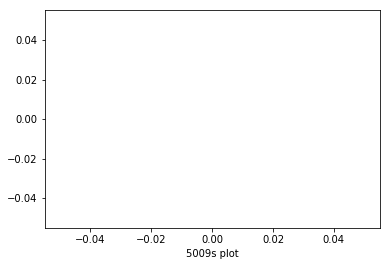

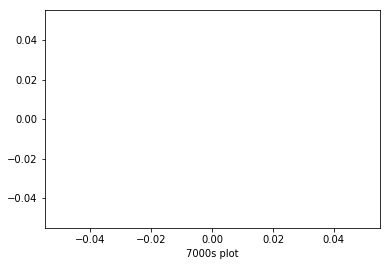

In [112]:
for i in range(len(SUBLIST)):
    plt.plot(train_datalist[i].iloc[:,0],train_datalist[i].iloc[:,1],'o')
    plt.xlabel(str(SUBLIST[i])+ "s plot")
    plt.show()

# 반드시 이상치 제거를 하고 넘어가야 하는데... 잘 모르겠다.

In [82]:
regr = RandomForestRegressor(max_depth=1, random_state=0, n_estimators=200)
regr.fit(np.array(train_data_1000.dropna()['ex2_1000']).reshape(-1, 1), np.array(train_data_1000.dropna()['ex1_1000']))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [117]:
regr.predict(np.array(71).reshape(-1,1))

array([85.67536601])

In [116]:
train_datalist[0].head()

,ex2_1000,ex1_1000
451,83.5,91
119,71,75
7,92,88.5
92,40,49.25
35,81,73.75


# 이상치를 제거하지 않은 경우, 별로 안맞음. 정보가 이것밖에 없는데 어떡할까?

# 이상치를 제거하고 실행할 것

In [ ]:
# 예측기의 list를 만들어 두는 페이지
forestlist = []
j=0
for i in range(len(SUBLIST)):
    forestlist.append(RandomForestRegressor(max_depth=2, random_state=0, n_estimators=500).fit(train_datalist[i].iloc[:,0],train_datalist[i].iloc[:,1]))

In [28]:
len(test_number)

145

In [166]:
Sumind[EX1_represent_Ac_std.columns[i]==Sumind['SUB_CD']]['AC_STD'].iloc[0]

60.5

관계식 도출 후에, 교집합의 수능과의 비교시에 각 집단을 몇퍼센트씩 섞었는가의 경우에 따라 가장 오류가 적어지는 비율이 있을 것이다.

예) 10%씩 끊어서 70:30 , 60: 40, 50:50, 40:60, 30:70 으로 변화한다.

가장 작은 오류를 보이는 곳에서 1%씩 변화하여 가장 오류가 작은 비율로 수능 데이터의 비율을 추정한다.

-> 이 비율에서 관계식의 변화를 추정한다.

In [83]:
len(EX1_represent_Ac_std.columns)

32

In [182]:
"""
dataDF= small_data[small_data['SUB_CD']==1000]
#시험 코드 대로 데이터프레임을 하나 만든다.

dataDF_0 = dataDF[dataDF['CHEONGSOL_YN']==0]
dataDF_1 = dataDF[dataDF['CHEONGSOL_YN']==1]
#비학원생의 데이터집합을 만든다

dataDF_0 = Concept_Rating(dataDF_0)

#비학원생끼리 다시 점수를 기반으로 레이팅한다. ->함수화
N_rate= 0.95 #비학원생이 95%면 좋겠다는 뜻
rate_len = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))

dataDF_X= pd.concat([dataDF_0,dataDF_1.iloc[rd.sample(range(len(dataDF_1)),rate_len),]])

dataDF_X = Concept_Rating(dataDF_X,'N95:Y5')
"""


Rating_Change_Matrix = np.zeros((9,9))
for i in range(1,10):
    for j in range(1,10):
        Rating_Change_Matrix[i-1][j-1]=round(len(dataDF_X[~(dataDF_X['PURE_RATING'].isnull()) & (dataDF_X['PURE_RATING']==i) & (dataDF_X['N95:Y5']==j)]
                                          )/len(dataDF_X[~(dataDF_X['PURE_RATING'].isnull()) & (dataDF_X['PURE_RATING']==i)])
                                      

        
#비율에 따라 몇프로가 이동했는지 계산한다.
#예시 ) 비학생 95% + 학원생 5% : nameming 'N95:Y5 RATING'
#1. 학원생을 추가한다
#2. 레이팅한다.
#3. 그것을 PURE_RATING이 NULL이 아닌것만 골라낸다.
#4. 1)원래 1이 몇이나 남아있는지 센다. 2) 원래 2는 몇이나 2가 됐는지 센다..


IndexError: cannot do a non-empty take from an empty axes.

In [173]:
for i in range(1,10):
    for j in range(1,10):
        Rating_Change_Matrix[i-1][j-1]=round(Rating_Change_Matrix[i-1][j-1],2)
print(Rating_Change_Matrix)

[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.93 0.07 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.94 0.06 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [154]:
len(dataDF_X[~(dataDF_X['PURE_RATING'].isnull()) & (dataDF_X['PURE_RATING']==6)])

1446

In [232]:
def MakeRank_by_rating(data,SUB_CODE):
    dataDF= data[data['SUB_CD']==SUB_CODE]
    #시험 코드 대로 데이터프레임을 하나 만든다.

    dataDF_0 = dataDF[dataDF['CHEONGSOL_YN']==0]
    dataDF_1 = dataDF[dataDF['CHEONGSOL_YN']==1]
    #비학원생의 데이터집합을 만든다
    dataDF_0 = Concept_Rating(dataDF_0)
    #비학원생끼리 다시 점수를 기반으로 레이팅한다. ->함수화
    
    N_rate = 0.7 #최대치
    already_sample = rd.sample(range(len(dataDF_1)),int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate))))
    
    N_rate = 0.95 #비학원생이 95%면 좋겠다는 뜻
    rate_len1 = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))
    Compare = 'N'+str(int(N_rate*100))+':Y'+str(100-int(N_rate*100))
    dataDF_X= pd.concat([dataDF_0,dataDF_1.iloc[already_sample[:rate_len1]]])
    dataDF_X = Concept_Rating(dataDF_X,Compare)
    
    
    N_rate = 0.9 #비학원생이 90%면 좋겠다는 뜻
    rate_len2 = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))-rate_len1
    Compare = 'N'+str(int(N_rate*100))+':Y'+str(100-int(N_rate*100))
    dataDF_X= pd.concat([dataDF_X,dataDF_1.iloc[already_sample[rate_len1:rate_len2]]])#여기서 이미 추가된 애들을 제외한다.
    dataDF_X = Concept_Rating(dataDF_X,Compare)
    
    N_rate = 0.85 
    rate_len3 = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))-rate_len2
    Compare = 'N'+str(int(N_rate*100))+':Y'+str(100-int(N_rate*100))
    dataDF_X= pd.concat([dataDF_X,dataDF_1.iloc[already_sample[rate_len2:rate_len3]]])#여기서 이미 추가된 애들을 제외한다.
    dataDF_X = Concept_Rating(dataDF_X,Compare)
    
    N_rate = 0.8 
    rate_len4 = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))-rate_len3
    Compare = 'N'+str(int(N_rate*100))+':Y'+str(100-int(N_rate*100))
    dataDF_X= pd.concat([dataDF_X,dataDF_1.iloc[already_sample[rate_len3:rate_len4]]])#여기서 이미 추가된 애들을 제외한다.
    dataDF_X = Concept_Rating(dataDF_X,Compare)
    
    N_rate = 0.75
    rate_len5 = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))-rate_len4
    Compare = 'N'+str(int(N_rate*100))+':Y'+str(100-int(N_rate*100))
    dataDF_X= pd.concat([dataDF_X,dataDF_1.iloc[already_sample[rate_len4:rate_len5]]])#여기서 이미 추가된 애들을 제외한다.
    dataDF_X = Concept_Rating(dataDF_X,Compare)
    
    N_rate = 0.7 
    rate_len6 = int(np.round(len(dataDF_0)*(1-N_rate)/(N_rate)))-rate_len5
    Compare = 'N'+str(int(N_rate*100))+':Y'+str(100-int(N_rate*100))
    dataDF_X= pd.concat([dataDF_X,dataDF_1.iloc[already_sample[rate_len5:rate_len6]]])#여기서 이미 추가된 애들을 제외한다.
    dataDF_X = Concept_Rating(dataDF_X,Compare)
    
    return dataDF_X

def MakeTSMatrix(dataDF_X ,Compare ,colname='PURE_RATING'):
    Rating_Change_Matrix = np.zeros((9,9))
    for i in range(1,10):
        for j in range(1,10):
            Rating_Change_Matrix[i-1][j-1]=round(len(dataDF_X[(dataDF_X['CHEONGSOL_YN']==0) & (dataDF_X[colname]==i) & (dataDF_X[Compare]==j)]
                                              )/len(dataDF_X[(dataDF_X['CHEONGSOL_YN']==0) & (dataDF_X[colname]==i)]),2)
    
    return Rating_Change_Matrix

In [96]:
small_data.iloc[rd.sample(range(len(small_data)),1),]

,EXAMTYPE,MEM_NO,SUB_CD,EXAMNO,SCORE,AC_STD,AC_PCT,RATING,CHEONGSOL_YN
2074493,2,1826646314021,4116,3028,41,51.0,41.0,5,1


In [104]:
len(small_data)/(len(small_data)+len(small_data)*(1-N_rate)/(N_rate))

0.9499999999999998

In [70]:
np.percentile(small_data[small_data['SUB_CD']==1000]['SCORE'],)

82.0

In [177]:
k_rate = 0.95
print('N'+str(int(k_rate*100))+':Y'+str(int(100*(1-k_rate))))

N95:Y5


In [1]:
def Concept_Rating(data,col_name='PURE_RATING' ,SCORE='SCORE'):
    SOCRE_percentile_list = [np.nanpercentile(data[SCORE],96),
                         np.nanpercentile(data[SCORE],89),
                         np.nanpercentile(data[SCORE],77),
                         np.nanpercentile(data[SCORE],60),
                         np.nanpercentile(data[SCORE],40),
                         np.nanpercentile(data[SCORE],23),
                         np.nanpercentile(data[SCORE],11),
                         np.nanpercentile(data[SCORE],4),
                        ]
    data[col_name] = None
    data.loc[data[SCORE]>=SOCRE_percentile_list[0],col_name]=1
    data.loc[(data[SCORE]<SOCRE_percentile_list[0]) & (data[SCORE]>=SOCRE_percentile_list[1]),col_name]=2
    data.loc[(data[SCORE]<SOCRE_percentile_list[1]) & (data[SCORE]>=SOCRE_percentile_list[2]),col_name]=3
    data.loc[(data[SCORE]<SOCRE_percentile_list[2]) & (data[SCORE]>=SOCRE_percentile_list[3]),col_name]=4
    data.loc[(data[SCORE]<SOCRE_percentile_list[3]) & (data[SCORE]>=SOCRE_percentile_list[4]),col_name]=5
    data.loc[(data[SCORE]<SOCRE_percentile_list[4]) & (data[SCORE]>=SOCRE_percentile_list[5]),col_name]=6
    data.loc[(data[SCORE]<SOCRE_percentile_list[5]) & (data[SCORE]>=SOCRE_percentile_list[6]),col_name]=7
    data.loc[(data[SCORE]<SOCRE_percentile_list[6]) & (data[SCORE]>=SOCRE_percentile_list[7]),col_name]=8
    data.loc[data[SCORE]<SOCRE_percentile_list[7],col_name]=9
    
    return data

In [216]:
#Test_data = MakeRank_by_rating(small_data,SUB_CODE=3000) #재학생 100% 행

#-> 처음부터 모두 만든다

Check_mat = MakeTSMatrix(Test_data,'N80:Y20')
print(Check_mat)

C:\Users\74857\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\74857\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\74857\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the curre

ZeroDivisionError: division by zero

In [230]:
len(Test_data[(Test_data['CHEONGSOL_YN']==0) & (Test_data['N80:Y20']==9)])

366

In [233]:
Check_mat = MakeTSMatrix(Test_data,'N80:Y20')
print(Check_mat)

[[0.79 0.21 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.67 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.83 0.17 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.87 0.13 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.92 0.08 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.94 0.06 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.93 0.07]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [234]:
Check_mat = MakeTSMatrix(Test_data,'N70:Y30','N80:Y20')
print(Check_mat)

[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.78 0.22 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.86 0.14 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.9  0.1  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.88 0.12 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.95 0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [220]:
#Test_data=Concept_Rating(small_data[small_data['SUB_CD']==3000],'N80:Y20')

Test_data.head()

,AC_PCT,AC_STD,CHEONGSOL_YN,EXAMNO,EXAMTYPE,MEM_NO,N75:Y25,N80:Y20,N85:Y15,N90:Y10,N95:Y5,PURE_RATING,RATING,SCORE,SUB_CD,N70:Y30
2042741,95.0,125.0,0,3028,2,1811401301001,4.0,4.0,4.0,4.0,4.0,4.0,2,80,3000,4
2042745,90.0,120.0,0,3028,2,1811401301002,5.0,5.0,5.0,5.0,5.0,5.0,3,77,3000,5
2042749,80.0,110.0,0,3028,2,1811401301003,6.0,6.0,6.0,6.0,6.0,6.0,4,66,3000,6
2042753,90.0,120.0,0,3028,2,1811401301004,5.0,5.0,5.0,5.0,5.0,5.0,3,77,3000,5
2042757,80.0,110.0,0,3028,2,1811401301005,6.0,6.0,6.0,6.0,6.0,6.0,4,67,3000,6
